In [1]:
#이거 말고 밑에 다른방법1로 해야함
pip install mplfinance

     |████████████████████████████████| 61kB 3.5MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib as mpl
import os 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM, Conv1D, Conv2D, GRU
from tensorflow.keras.layers import TimeDistributed
from tensorflow import keras

In [3]:
plt.rcParams['font.family'] = 'NanumbarunGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
from google.colab import files
uploaded=files.upload()

Saving NASDAQ.csv.txt to NASDAQ.csv.txt


In [5]:
import io
nasdaq=pd.read_csv(io.BytesIO(uploaded['NASDAQ.csv.txt']))
nasdaq.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020년 06월 30일,"10,058.76","9,875.29","10,085.59","9,863.67",1.10B,1.87%
1,2020년 06월 29일,"9,874.15","9,771.72","9,877.34","9,663.61",977.01M,1.20%
2,2020년 06월 26일,"9,757.22","9,995.12","10,000.67","9,749.07",2.67B,-2.59%
3,2020년 06월 25일,"10,017.00","9,899.36","10,023.28","9,810.47",1.06B,1.09%
4,2020년 06월 24일,"9,909.17","10,092.92","10,137.50","9,842.22",1.26B,-2.19%


In [6]:
from google.colab import files
uploaded=files.upload()

Saving Philadelphia Semiconductor Index.csv.txt to Philadelphia Semiconductor Index.csv.txt


In [7]:
import io
phila=pd.read_csv(io.BytesIO(uploaded['Philadelphia Semiconductor Index.csv.txt']))
phila.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020년 06월 30일,"1,996.44","1,954.54","2,002.08","1,953.22",-,2.70%
1,2020년 06월 29일,"1,943.90","1,924.80","1,944.64","1,899.80",-,1.14%
2,2020년 06월 26일,"1,921.92","1,959.50","1,964.01","1,917.83",-,-2.00%
3,2020년 06월 25일,"1,961.05","1,941.59","1,963.72","1,914.30",-,0.86%
4,2020년 06월 24일,"1,944.30","1,976.63","1,988.23","1,930.69",-,-2.18%


In [8]:
from google.colab import files
uploaded=files.upload()

Saving exchange_2017-01-01_2020-06-30.csv.txt to exchange_2017-01-01_2020-06-30.csv.txt


In [9]:
import io
exchange=pd.read_csv(io.BytesIO(uploaded['exchange_2017-01-01_2020-06-30.csv.txt']))
exchange.head()

,Date,Open,High,Low,Close
0,2017-01-02,"1,206.85","1,210.20","1,204.42","1,207.64"
1,2017-01-03,"1,207.36","1,211.90","1,201.29","1,208.36"
2,2017-01-04,"1,209.16","1,211.82","1,196.22","1,198.90"
3,2017-01-05,"1,199.38","1,201.48","1,182.63","1,185.78"
4,2017-01-06,"1,186.11","1,200.00","1,179.33","1,196.32"


In [10]:
from google.colab import files
uploaded=files.upload()

Saving KOSPI.csv.txt to KOSPI.csv.txt


In [11]:
import io
kospi=pd.read_csv(io.BytesIO(uploaded['KOSPI.csv.txt']))
kospi.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2020년 06월 30일,"2,108.33","2,124.38","2,134.38","2,108.26",708.60M,0.71%
1,2020년 06월 29일,"2,093.48","2,105.54","2,120.50","2,087.84",643.16M,-1.93%
2,2020년 06월 26일,"2,134.65","2,137.47","2,142.04","2,115.25",761.04M,1.05%
3,2020년 06월 25일,"2,112.37","2,130.45","2,143.33","2,112.37",1.02B,-2.27%
4,2020년 06월 24일,"2,161.51","2,145.93","2,171.86","2,143.91",913.90M,1.42%


In [12]:
from google.colab import files
uploaded=files.upload()

Saving sse.csv to sse.csv


In [13]:
import io
sse=pd.read_csv(io.BytesIO(uploaded['sse.csv']))
sse.head()

,Date,Open,High,Low,Close,Volume,Change
0,2018-01-02,51380,51400,50780,51020,169485,0.001177
1,2018-01-03,52540,52560,51420,51620,200270,0.011760
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461
3,2018-01-05,51300,52120,51200,52120,189623,0.020360
4,2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [14]:
from google.colab import files
uploaded=files.upload()

Saving SSEforeign2017-2020.xlsx to SSEforeign2017-2020.xlsx


In [15]:
import io
foreign=pd.read_excel(io.BytesIO(uploaded['SSEforeign2017-2020.xlsx']))
foreign.head()

,Date,기관 순매매량,외국인 순매매량,외국인 보유주 수,외국인 보유율
0,2020.09.07,-897885,-75509,3330377694,55.79%
1,2020.09.04,-2508980,-1959260,3330417203,55.79%
2,2020.09.03,"+265,036","+4,005,421",3332550013,55.82%
3,2020.09.02,"+59,529",-1235282,3328550592,55.76%
4,2020.09.01,-952340,-1455952,3329332324,55.77%


In [16]:
from google.colab import files
uploaded=files.upload()

Saving KOREA_bond_1year.csv.txt to KOREA_bond_1year.csv.txt


In [17]:
import io
bond=pd.read_csv(io.BytesIO(uploaded['KOREA_bond_1year.csv.txt']))
bond.head()

,날짜,종가,오픈,고가,저가,변동 %
0,2020년 06월 30일,0.590,0.591,0.591,0.590,3.15%
1,2020년 06월 29일,0.572,0.570,0.572,0.570,0.53%
2,2020년 06월 28일,0.569,0.569,0.569,0.569,0.00%
3,2020년 06월 27일,0.569,0.569,0.569,0.569,0.00%
4,2020년 06월 26일,0.569,0.570,0.570,0.568,1.79%


In [18]:
from google.colab import files
uploaded=files.upload()

Saving SSE_PBR_PER_ROE.csv.txt to SSE_PBR_PER_ROE.csv.txt


In [19]:
import io
pbr=pd.read_csv(io.BytesIO(uploaded['SSE_PBR_PER_ROE.csv.txt']))
pbr.head()

,Date,Close,PBR,PER,ROE
0,2017-01-02,36100.0,0.031289,0.359220,0.087102
1,2017-01-03,36480.0,0.031618,0.363001,0.087102
2,2017-01-04,36160.0,0.031341,0.359817,0.087102
3,2017-01-05,35560.0,0.030821,0.353847,0.087102
4,2017-01-06,36200.0,0.031376,0.360215,0.087102


In [20]:
samsung=sse
samsung.drop('Change', axis=1, inplace=True)
samsung = samsung[samsung['Open']!=0]
samsung.index = pd.to_datetime(samsung.Date)
samsung.drop('Date', axis=1, inplace=True)
samsung = samsung['2018-01-01':]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
samsung.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,51380,51400,50780,51020,169485
2018-01-03,52540,52560,51420,51620,200270
2018-01-04,52120,52180,50640,51080,233909
2018-01-05,51300,52120,51200,52120,189623
2018-01-08,52400,52520,51500,52020,167673


In [22]:
def investing_preprocessing(filepath):
    data = pd.read_csv(str(filepath))[::-1].reset_index(drop=True)
    if '날짜' in data.keys():
        data['날짜'] = data['날짜'].str.replace('([0-9]{4})년 ([0-9]{2})월 ([0-9]{2})일', '\\1-\\2-\\3')
        data.rename(columns={'날짜':'Date'}, inplace=True)
    data.index = pd.to_datetime(data['Date'])
    data.drop('Date', axis=1, inplace=True)
    return data

def process_Volume(volume):
    if volume == '-':
        return np.nan
    
    scale = volume[-1]
    val = float(volume[:-1])
    
    if scale == 'K':
        val = val*1e3
    elif scale == 'M':
        val = val*1e6
    elif scale == 'B':
        val = val*1e9
        
    return val

In [23]:
nasdaq = investing_preprocessing('NASDAQ.csv.txt')
nasdaq['거래량'] = nasdaq['거래량'].apply(process_Volume)
nasdaq.keys()
nasdaq = nasdaq['종가'].str.replace(",", '').astype(float)
nasdaq.head(2)

Date
2018-01-02    7006.90
2018-01-03    7065.53
Name: 종가, dtype: float64

In [24]:
exchange = investing_preprocessing('exchange_2017-01-01_2020-06-30.csv.txt')
exchange = exchange['Open'].str.replace(",", '').astype(float)[::-1]['2018-01-01':]
exchange.head(2)

Date
2018-01-01    1067.38
2018-01-02    1067.23
Name: Open, dtype: float64

In [25]:

Semiconductor = investing_preprocessing('Philadelphia Semiconductor Index.csv.txt')
Semiconductor = Semiconductor['종가'].str.replace(",", '').astype(float)['2018-01-01':]
Semiconductor.head(2)

Date
2018-01-02    1287.70
2018-01-03    1309.86
Name: 종가, dtype: float64

In [26]:
foreign = pd.read_excel('SSEforeign2017-2020.xlsx')
foreign.index = pd.to_datetime(foreign['Date'])
foreign.drop('Date', axis=1, inplace=True)
foreign['기관 순매매량'] = foreign['기관 순매매량'].str.replace(",", '').astype(float)
foreign['외국인 순매매량'] = foreign['외국인 순매매량'].str.replace(",", '').astype(float)
foreign = foreign[['기관 순매매량', '외국인 순매매량']][::-1]['2018-01-01':]
foreign.head(2)

,기관 순매매량,외국인 순매매량
Date,,
2018-01-02,-23405.0,-18019.0
2018-01-03,-47563.0,45759.0


In [27]:

KOSPI = investing_preprocessing('KOSPI.csv.txt')
KOSPI = KOSPI['종가'].str.replace(",", '').astype(float)
KOSPI.head(2)

Date
2018-01-02    2479.65
2018-01-03    2486.35
Name: 종가, dtype: float64

In [28]:
Korea_bond_1year = investing_preprocessing('KOREA_bond_1year.csv.txt')
Korea_bond_1year = Korea_bond_1year['종가']['2018-01-01':]
Korea_bond_1year.head(2)

Date
2018-01-02    1.816
2018-01-03    1.792
Name: 종가, dtype: float64

In [29]:
PBR_PER_ROE = investing_preprocessing('SSE_PBR_PER_ROE.csv.txt')
PBR_PER_ROE = PBR_PER_ROE[['PBR', 'PER', 'ROE']][::-1]['2018-01-01':]
PBR_PER_ROE.head(2)

,PBR,PER,ROE
Date,,,
2018-01-02,0.037682,0.265244,0.142064
2018-01-03,0.038125,0.268364,0.142064


In [30]:
inputdata = pd.concat([samsung, nasdaq, exchange, Semiconductor, foreign, KOSPI, Korea_bond_1year, PBR_PER_ROE], axis=1)

In [31]:
inputdata.columns = ["Open", "High", "Low", "Close", "Volume", "nasdaq", 
                     "exchange", "Semiconductor", "foreign", "institution", 
                     "KOSPI", "Korea_bond_1year", "PBR", "PER", "ROE"]

In [32]:
inputdata.dropna(subset=['Close'], inplace=True)

In [33]:
inputdata.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume               0
nasdaq              19
exchange             0
Semiconductor       19
foreign              0
institution          0
KOSPI                0
Korea_bond_1year     1
PBR                  0
PER                  0
ROE                  0
dtype: int64

In [34]:
inputdata.dropna(inplace=True)

In [35]:
inputdata[inputdata.nasdaq.isnull()].index == inputdata[inputdata.Semiconductor.isnull()].index

array([], dtype=bool)

In [36]:
inputdata[inputdata.nasdaq.isnull()].index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [37]:
inputdata[inputdata.nasdaq.isnull()].index.day_name()

Index([], dtype='object', name='Date')

In [38]:
inputdata.head()

,Open,High,Low,Close,Volume,nasdaq,exchange,Semiconductor,foreign,institution,KOSPI,Korea_bond_1year,PBR,PER,ROE
Date,,,,,,,,,,,,,,,
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,7006.90,1067.23,1287.70,-23405.0,-18019.0,2479.65,1.816,0.037682,0.265244,0.142064
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,7065.53,1062.88,1309.86,-47563.0,45759.0,2486.35,1.792,0.038125,0.268364,0.142064
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,7077.91,1064.84,1317.24,-39755.0,26643.0,2466.46,1.800,0.037726,0.265556,0.142064
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,7136.56,1063.33,1325.71,5786.0,9550.0,2497.52,1.781,0.038494,0.270963,0.142064
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,7157.39,1062.27,1335.54,-17940.0,9060.0,2513.28,1.789,0.038420,0.270443,0.142064


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(inputdata)

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = inputdata.keys()

df_scaled.head()

,Open,High,Low,Close,Volume,nasdaq,exchange,Semiconductor,foreign,institution,KOSPI,Korea_bond_1year,PBR,PER,ROE
0,0.567413,0.5520,0.572074,0.546076,0.000429,0.206675,0.058961,0.233419,0.711073,0.339060,0.896068,0.855892,0.003531,0.001045,0.693746
1,0.614664,0.5984,0.598357,0.570221,0.000915,0.221562,0.037834,0.257113,0.710345,0.340881,0.901942,0.839731,0.003776,0.001080,0.693746
2,0.597556,0.5832,0.566324,0.548491,0.001446,0.224705,0.047353,0.265004,0.710580,0.340335,0.884503,0.845118,0.003556,0.001048,0.693746
3,0.564155,0.5808,0.589322,0.590342,0.000747,0.239597,0.040019,0.274060,0.711953,0.339847,0.911736,0.832323,0.003980,0.001110,0.693746
4,0.608961,0.5968,0.601643,0.586318,0.000400,0.244886,0.034871,0.284570,0.711238,0.339833,0.925553,0.837710,0.003940,0.001104,0.693746


In [ ]:
df_scaled.isna().sum()

Open                0
High                0
Low                 0
Close               0
Volume              0
nasdaq              0
exchange            0
Semiconductor       0
foreign             0
institution         0
KOSPI               0
Korea_bond_1year    0
PBR                 0
PER                 0
ROE                 0
dtype: int64

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
TEST_SIZE = 100
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = inputdata.columns
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((376, 20, 15), (94, 20, 15))

In [ ]:
test_feature=test[feature_cols]
test_label=test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((80, 20, 15), (80, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=20)
history=model.fit(x_train,y_train,epochs=100,batch_size=1,validation_split=0,callbacks=[early_stopping])


Epoch 1/100
376/376 [==============================] - 2s 4ms/step - loss: 8.2454e-04 - mse: 8.2454e-04
Epoch 2/100
376/376 [==============================] - 2s 4ms/step - loss: 9.0361e-04 - mse: 9.0361e-04
Epoch 3/100
376/376 [==============================] - 2s 4ms/step - loss: 8.2507e-04 - mse: 8.2507e-04
Epoch 4/100
376/376 [==============================] - 2s 4ms/step - loss: 9.0868e-04 - mse: 9.0868e-04
Epoch 5/100
376/376 [==============================] - 2s 4ms/step - loss: 8.4611e-04 - mse: 8.4611e-04
Epoch 6/100
376/376 [==============================] - 2s 4ms/step - loss: 7.8683e-04 - mse: 7.8683e-04
Epoch 7/100
376/376 [==============================] - 2s 4ms/step - loss: 8.2932e-04 - mse: 8.2932e-04
Epoch 8/100
376/376 [==============================] - 2s 4ms/step - loss: 8.2016e-04 - mse: 8.2016e-04
Epoch 9/100
376/376 [==============================] - 2s 4ms/step - loss: 8.3888e-04 - mse: 8.3888e-04
Epoch 10/100
376/376 [==============================] - 2s 4ms/s

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2048      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 2,065
Trainable params: 2,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:


# 예측
pred = model.predict(test_feature)

findfont: Font family ['NanumbarunGothic'] not found. Falling back to DejaVu Sans.


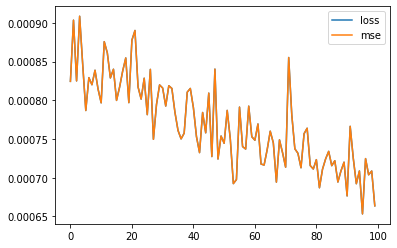

In [ ]:
pd.DataFrame(history.history).plot()

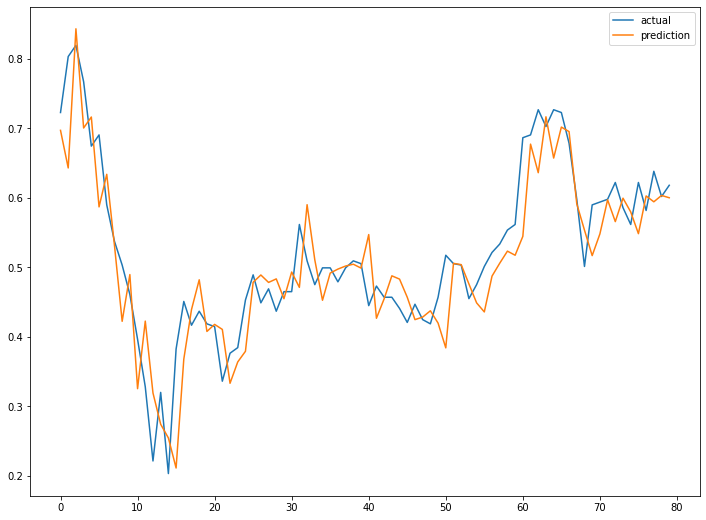

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

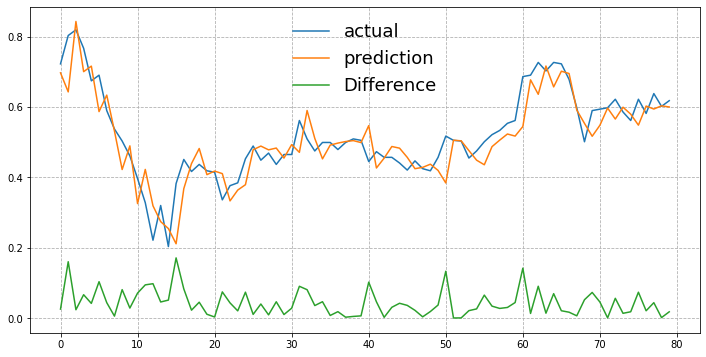

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.plot(np.sqrt((pred - test_label)**2), label='Difference')
plt.legend(frameon=False, fontsize = 18)
plt.grid(ls='--')
plt.show()

In [ ]:
mse=mean_squared_error(test_label, pred)
rmse=np.sqrt(mse)
rmse

0.05699898434941082

In [ ]:

def Naivemodel(data, predict_range):
    """
    마지막 값을 그대로 예측
    """
    pred = np.empty([len(data), predict_range])
    for i, j in enumerate(data):
        pred[i,:] = np.full(predict_range, j[-1, 3])
    return pred

In [ ]:
naive_data = Naivemodel(test_feature, 1)

In [ ]:
np.mean(keras.losses.mean_squared_error(test_label, pred))

0.0032488846

In [ ]:
np.mean(keras.losses.mean_squared_error(test_label, naive_data))

0.0027683201826654105

In [ ]:
#정확도
test_sign = np.sign(test_label.flatten() - test_feature[:, -1, 3])
pred_sign = np.sign(pred.flatten() - test_feature[:, -1, 3])
sum(test_sign == pred_sign)/len(pred_sign)

0.5625

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

findfont: Font family ['NanumbarunGothic'] not found. Falling back to DejaVu Sans.


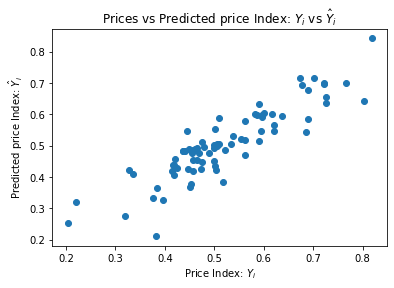

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(test_label, pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

#예측값과 원래값이 일치하면 직선에 가깝게 분포됨

다른 모델


In [40]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(inputdata)

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = inputdata.keys()

df_scaled.head()

,Open,High,Low,Close,Volume,nasdaq,exchange,Semiconductor,foreign,institution,KOSPI,Korea_bond_1year,PBR,PER,ROE
0,0.567413,0.5520,0.572074,0.546076,0.000429,0.206675,0.058961,0.233419,0.711073,0.339060,0.896068,0.855892,0.003531,0.001045,0.693746
1,0.614664,0.5984,0.598357,0.570221,0.000915,0.221562,0.037834,0.257113,0.710345,0.340881,0.901942,0.839731,0.003776,0.001080,0.693746
2,0.597556,0.5832,0.566324,0.548491,0.001446,0.224705,0.047353,0.265004,0.710580,0.340335,0.884503,0.845118,0.003556,0.001048,0.693746
3,0.564155,0.5808,0.589322,0.590342,0.000747,0.239597,0.040019,0.274060,0.711953,0.339847,0.911736,0.832323,0.003980,0.001110,0.693746
4,0.608961,0.5968,0.601643,0.586318,0.000400,0.244886,0.034871,0.284570,0.711238,0.339833,0.925553,0.837710,0.003940,0.001104,0.693746


In [43]:
TEST_SIZE = 100
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [45]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [46]:
feature_cols = df_scaled.columns
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((376, 20, 15), (94, 20, 15))

In [47]:
test_feature=test[feature_cols]
test_label=test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((80, 20, 15), (80, 1))

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2048      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 2,065
Trainable params: 2,065
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=20)
history=model.fit(x_train,y_train,epochs=100,batch_size=1,validation_split=0,callbacks=[early_stopping])

Epoch 1/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0229 - mse: 0.0229
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0020 - mse: 0.0020
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0021 - mse: 0.0021
Epoch 7/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0017 - mse: 0.0017
Epoch 8/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 9/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0017 - mse: 0.0017
Epoch 10/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 11/100
376/376 [=================

In [51]:
# 예측
pred = model.predict(test_feature)

findfont: Font family ['NanumbarunGothic'] not found. Falling back to DejaVu Sans.


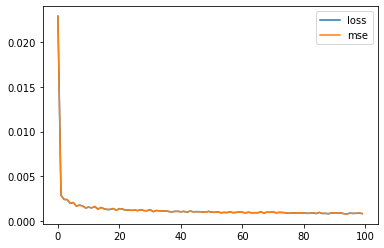

In [52]:
pd.DataFrame(history.history).plot()

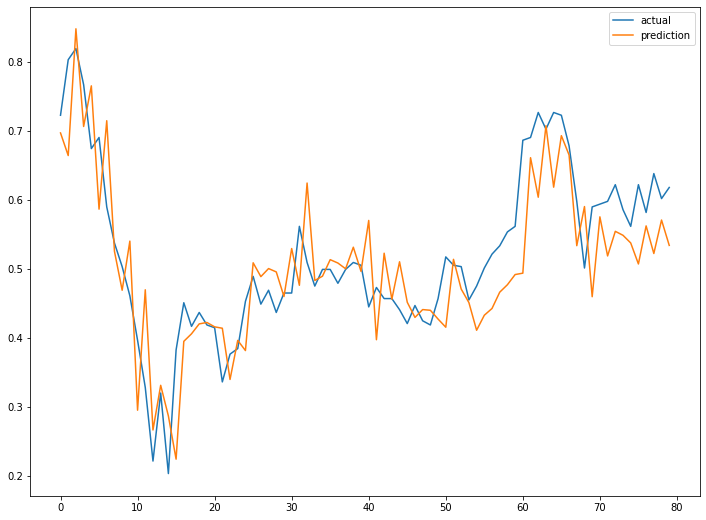

In [53]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

findfont: Font family ['NanumbarunGothic'] not found. Falling back to DejaVu Sans.


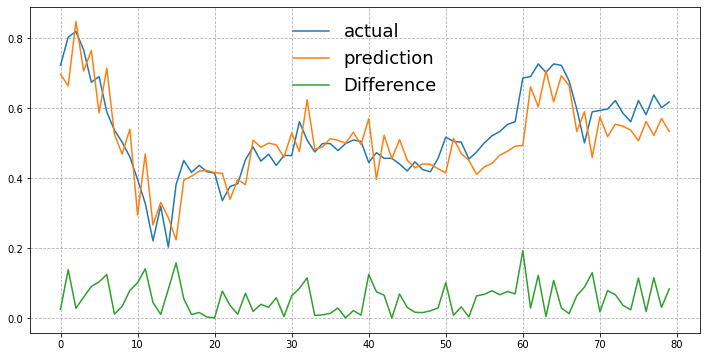

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.plot(np.sqrt((pred - test_label)**2), label='Difference')
plt.legend(frameon=False, fontsize = 18)
plt.grid(ls='--')
plt.show()

In [55]:
mse=mean_squared_error(test_label, pred)
rmse=np.sqrt(mse)
rmse

0.07054908734454027

In [56]:
def Naivemodel(data, predict_range):
    """
    마지막 값을 그대로 예측
    """
    pred = np.empty([len(data), predict_range])
    for i, j in enumerate(data):
        pred[i,:] = np.full(predict_range, j[-1, 3])
    return pred

In [58]:
naive_data = Naivemodel(test_feature, 1)

np.mean(keras.losses.mean_squared_error(test_label, pred))



0.004977174

In [59]:
np.mean(keras.losses.mean_squared_error(test_label, naive_data))

0.0027683201826654105

In [60]:
#정확도
test_sign = np.sign(test_label.flatten() - test_feature[:, -1, 3])
pred_sign = np.sign(pred.flatten() - test_feature[:, -1, 3])
sum(test_sign == pred_sign)/len(pred_sign)

0.5375

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

findfont: Font family ['NanumbarunGothic'] not found. Falling back to DejaVu Sans.


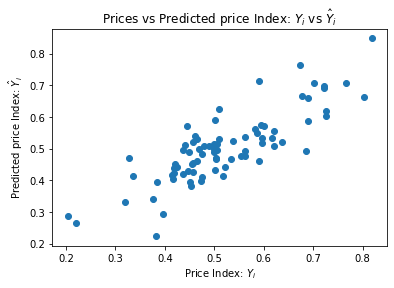

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(test_label, pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

#예측값과 원래값이 일치하면 직선에 가깝게 분포됨

다른방법2


In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [74]:
np.random.seed(5)

In [83]:
model2 = Sequential()
model2.add(LSTM(10,input_shape=(train_feature.shape[1], train_feature.shape[2]),activation='relu',return_sequences=False))
model2.add(Dense(5))
model2.add(Dense(1))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                1040      
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [85]:
model2.compile(loss='mse',optimizer='adam',metrics=['mse'])

from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=20)
history2=model2.fit(x_train,y_train,epochs=100,batch_size=1,validation_split=0,callbacks=[early_stopping])

Epoch 1/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0168 - mse: 0.0168
Epoch 2/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0047 - mse: 0.0047
Epoch 3/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 4/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0032 - mse: 0.0032
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0026 - mse: 0.0026
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0023 - mse: 0.0023
Epoch 7/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0021 - mse: 0.0021
Epoch 8/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0021 - mse: 0.0021
Epoch 9/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 10/100
376/376 [==============================] - 1s 3ms/step - loss: 0.0017 - mse: 0.0017
Epoch 11/100
376/376 [=================

In [86]:
# 예측
pred = model2.predict(test_feature)

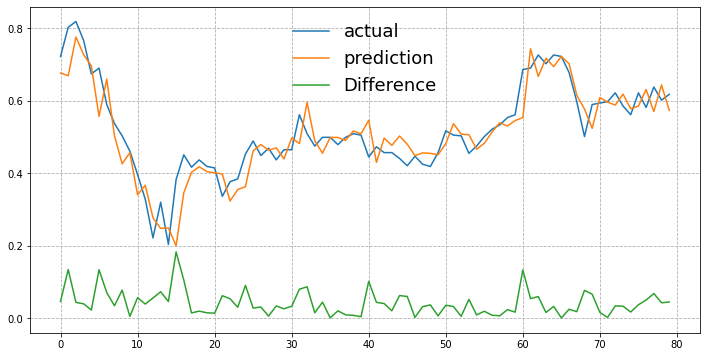

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.plot(np.sqrt((pred - test_label)**2), label='Difference')
plt.legend(frameon=False, fontsize = 18)
plt.grid(ls='--')
plt.show()

In [89]:
mse=mean_squared_error(test_label, pred)
rmse=np.sqrt(mse)
rmse


0.053810217355238325

In [90]:
def Naivemodel(data, predict_range):
    """
    마지막 값을 그대로 예측
    """
    pred = np.empty([len(data), predict_range])
    for i, j in enumerate(data):
        pred[i,:] = np.full(predict_range, j[-1, 3])
    return pred

In [91]:
naive_data = Naivemodel(test_feature, 1)

In [92]:
np.mean(keras.losses.mean_squared_error(test_label, pred))

0.00289554

In [93]:
np.mean(keras.losses.mean_squared_error(test_label, naive_data))

0.0027683201826654105

In [94]:
#정확도
test_sign = np.sign(test_label.flatten() - test_feature[:, -1, 3])
pred_sign = np.sign(pred.flatten() - test_feature[:, -1, 3])
sum(test_sign == pred_sign)/len(pred_sign)

0.5625

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

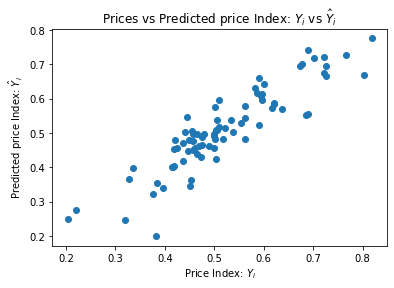

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(test_label, pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

#예측값과 원래값이 일치하면 직선에 가깝게 분포됨

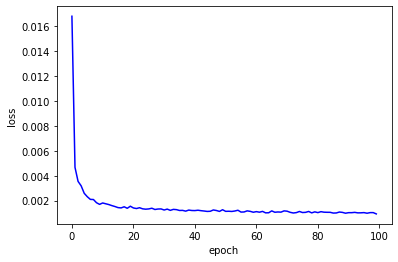

In [98]:
#훈련 손실값
fig, loss_ax=plt.subplots()
loss_ax.plot(history2.history['loss'], 'b', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

모델3(모델2랑 같음)


In [101]:
model3=Sequential()
model3.add(Dense(units=2,activation='relu'))
model3.add(Dense(units=10,activation='softmax'))

In [102]:
model3.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [111]:
print(len(x_train))

376


In [112]:
X_val = x_train[120:]
Y_val = y_train[120:]

In [117]:
history3 = model3.fit(x_train, y_train, epochs=100, batch_size=1, validation_data=(x_valid, y_valid))

Epoch 1/100
376/376 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.0981 - val_accuracy: 0.0000e+00
Epoch 2/100
376/376 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.0981 - val_accuracy: 0.0000e+00
Epoch 3/100
376/376 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.0027 - val_loss: 0.0981 - val_accuracy: 0.0000e+00
Epoch 4/100
376/376 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.0027 - val_loss: 0.0981 - val_accuracy: 0.0000e+00
Epoch 5/100
376/376 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.0981 - val_accuracy: 0.0000e+00
Epoch 6/100
376/376 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.0981 - val_accuracy: 0.0000e+00
Epoch 7/100
376/376 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.0000e+

In [118]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 20, 2)             32        
_________________________________________________________________
dense_11 (Dense)             (None, 20, 10)            30        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [119]:
# 예측
pred = model2.predict(test_feature)

In [120]:
mse=mean_squared_error(test_label, pred)
rmse=np.sqrt(mse)
rmse

0.053810217355238325

In [121]:
#정확도
test_sign = np.sign(test_label.flatten() - test_feature[:, -1, 3])
pred_sign = np.sign(pred.flatten() - test_feature[:, -1, 3])
sum(test_sign == pred_sign)/len(pred_sign)

0.5625